In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [161]:
pll21 = pd.read_csv('pl_20-21.csv')
pl21.dtypes


Unnamed: 0                  int64
Name                       object
Position                   object
Appearances                 int64
Clean sheets              float64
Goals Conceded            float64
Tackles                   float64
Tackle success %          float64
Last man tackles          float64
Blocked shots             float64
Interceptions             float64
Clearances                float64
Headed Clearance          float64
Clearances off line       float64
Recoveries                float64
Duels won                 float64
Duels lost                float64
Successful 50/50s         float64
Aerial battles won        float64
Aerial battles lost       float64
Own goals                 float64
Errors leading to goal    float64
Assists                     int64
Passes                     object
Passes per match          float64
Big Chances Created       float64
Crosses                   float64
Cross accuracy %           object
Through balls             float64
Accurate long 

In [162]:
#Eliminating players that didn't make a single appearance in the 2020/21 season and then finding the top 3 goalscorers.

pl21 = pl21[pl21['Appearances']!=0]

top_scorers = pl21.nlargest(3, ['Goals'])
top_scorers


,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Involvements
405,405,Harry Kane,Forward,35,NaN,NaN,22.0,NaN,NaN,28.0,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
550,550,Mohamed Salah,Forward,37,NaN,NaN,18.0,NaN,NaN,36.0,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
122,122,Bruno Fernandes,Midfielder,37,NaN,NaN,57.0,0.53,NaN,37.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


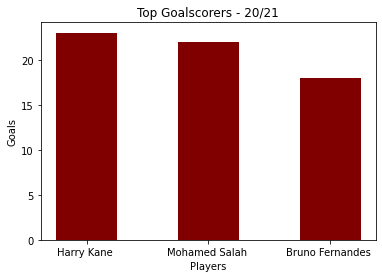

In [163]:
plt.bar(top_scorers['Name'],top_scorers['Goals'],color='maroon',width=0.5)
plt.xlabel("Players")
plt.ylabel("Goals")
plt.title("Top Goalscorers - 20/21")
plt.show()

In [165]:
#Creating a new column 'Involvements'

pl21['Involvements'] = pl21['Goals'] + pl21['Assists']

# Selecting 3 players with the highest goal involvements

involvements = pl21.nlargest(3, 'Involvements')
involvements


,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Involvements
405,405,Harry Kane,Forward,35,NaN,NaN,22.0,NaN,NaN,28.0,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
122,122,Bruno Fernandes,Midfielder,37,NaN,NaN,57.0,0.53,NaN,37.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
550,550,Mohamed Salah,Forward,37,NaN,NaN,18.0,NaN,NaN,36.0,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


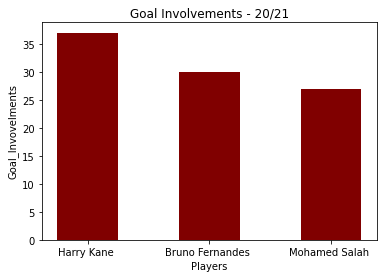

In [166]:
plt.bar(involvements['Name'],involvements['Involvements'],color='maroon',width=0.5)
plt.xlabel("Players")
plt.ylabel("Goal_Invovelments")
plt.title("Goal Involvements - 20/21")
plt.show()

In [167]:
#Extracting data of all midfielders first and then narrowing on to Kanté

midfielders21= pl21[pl21['Position']=='Midfielder']



# Creating a series of midfielders who make top 10 in the number of Interceptions, Duels and then Tackles.

interceptions=midfielders21.nlargest(10, 'Interceptions')[['Name','Interceptions']]
duels=midfielders21.nlargest(10, 'Duels won')[['Name','Duels won']]
tackles=midfielders21.nlargest(10, 'Tackles')[['Name', 'Tackles']]

for i in [interceptions, duels, tackles]:
    print(i,"\n")

                            Name  Interceptions
121              Josh Brownhill            69.0
681                 Rúben Neves            65.0
101               Yves Bissouma            64.0
740                Tomas Soucek            62.0
572               Wilfred Ndidi            61.0
406                N'Golo Kanté            59.0
659                 Declan Rice            59.0
851  André-Frank Zambo Anguissa            56.0
689                Romain Saïss            52.0
654               Harrison Reed            50.0 

                            Name  Duels won
740                Tomas Soucek       364.0
851  André-Frank Zambo Anguissa       264.0
315               Jack Grealish       231.0
101               Yves Bissouma       227.0
364       Pierre-Emile Højbjerg       217.0
775             Youri Tielemans       217.0
524                 John McGinn       211.0
672                       Rodri       209.0
287             Conor Gallagher       196.0
573             Tanguy Ndombel

In [168]:
#Making a dataframe with only defenders
defenders = pl21[pl21['Position']=='Defender']

#Selecting 3 defenders with more than 30 appearances and making a new column 'Conceded per game',
#which is Goals conceded/Appearances.

defenders=defenders[defenders['Appearances']>30]
least_conceded=defenders.nsmallest(3,'Goals Conceded').sort_values(by=["Goals Conceded"])
least_conceded[['Name','Goals Conceded']]

,Name,Goals Conceded
680,Rúben Dias,21.0
378,Reece James,29.0
718,Luke Shaw,33.0


In [169]:
#Finding the top 3 players with the highest tackle success rate
best_tackle_rate= top_def_stats.nsmallest(3,'Tackle success %').sort_values(by=["Tackle success %"],ascending=False)
best_tackle_rate[['Name','Tackle success %']]

,Name,Tackle success %
178,Vladimir Coufal,0.49
762,Matt Targett,0.47
12,Semi Ajayi,0.35


In [170]:
#Goalkeeper Stats
goalkeepers = pl21[pl21['Position']=='Goalkeeper']
goalkeepers = goalkeepers[goalkeepers['Appearances']>=36]

goalkeepers[['Name','Appearances','Clean sheets', 'Goals Conceded','Saves']].sort_values(by=['Clean sheets'],ascending=False)



,Name,Appearances,Clean sheets,Goals Conceded,Saves
235,Ederson,36,19.0,28.0,66.0
244,Emiliano Martínez,38,15.0,46.0,142.0
465,Hugo Lloris,38,12.0,45.0,114.0
708,Kasper Schmeichel,38,11.0,50.0,88.0
685,Rui Patrício,37,10.0,51.0,100.0
41,Alphonse Areola,36,9.0,48.0,116.0
321,Vicente Guaita,37,8.0,64.0,106.0
396,Sam Johnstone,37,6.0,74.0,166.0
647,Aaron Ramsdale,38,5.0,63.0,147.0
